NetworkX と Pandas の使い方を勉強するために、とりあえず日本を徒歩で縦断しようと思います。最短距離で札幌から那覇まで徒歩何時間かかるでしょうか？また、どのルートを通るでしょうか？ただし、海を渡るときだけフェリーを使います。

In [1]:
%%writefile location.txt 
Town,Longitude,Latitude
Sapporo,43.06417,141.34694
Aomori,40.82444,140.74
Morioka,39.70361,141.1525
Sendai,38.26889,140.87194
Akita,39.71861,140.1025
Yamagata,38.24056,140.36333
Fukushima,37.75,140.46778
Mito,36.34139,140.44667
Utsunomiya,36.56583,139.88361
Maebashi,36.39111,139.06083
Saitama,35.85694,139.64889
Chiba,35.60472,140.12333
Tokyo,35.68944,139.69167
Yokohama,35.44778,139.6425
Niigata,37.90222,139.02361
Toyama,36.69528,137.21139
Kanazawa,36.59444,136.62556
Fukui,36.06528,136.22194
Kofu,35.66389,138.56833
Nagano,36.65139,138.18111
Gifu,35.39111,136.72222
Shizuoka,34.97694,138.38306
Nagoya,35.18028,136.90667
Tsu,34.73028,136.50861
Otsu,35.00444,135.86833
Kyoto,35.02139,135.75556
Osaka,34.68639,135.52
Kobe,34.69139,135.18306
Nara,34.68528,135.83278
Wakayama,34.22611,135.1675
Tottori,35.50361,134.23833
Matsue,35.47222,133.05056
Okayama,34.66167,133.935
Hiroshima,34.39639,132.45944
Yamaguchi,34.18583,131.47139
Tokushima,34.06583,134.55944
Takamatsu,34.34028,134.04333
Matsuyama,33.84167,132.76611
Kochi,33.55972,133.53111
Fukuoka,33.60639,130.41806
Saga,33.24944,130.29889
Nagasaki,32.74472,129.87361
Kumamoto,32.78972,130.74167	
Oita,33.23806,131.6125
Miyazaki,31.91111,131.42389
Kagoshima,31.56028,130.55806
Naha,26.2125,127.68111

Overwriting location.txt


In [2]:
%%writefile walk.txt
Town1   Town2   Hour  Ferry
Sapporo Aomori 55  True
Akita      Aomori 36
Akita      Sendai  45
Akita      Niigata  52
Yamagata  Aomori 75
Morioka   Aomori    37
Morioka Akita 24
Yamagata Akita 41
Yamagata Morioka 46
Yamagata Sendai 14
Morioka Sendai 36
Fukushima   Sendai 16
Fukushima Yamagata 17
Fukushima Niigata 36
Yamagata Niigata 32
Fukushima Mito 35
Fukushima Utsunomiya 33
Niigata Maebashi 46
Niigata Toyama 49
Niigata Nagano 38
Niigata   Utsunomiya 52
Mito  Utsunomiya 14
Mito Chiba 21
Mito   Saitama 21
Maebashi Saitama 17
Utsunomiya Saitama 17
Utsunomiya Maebashi 19
Nagano Maebashi 25
Nagano Toyama 36
Nagano Gifu 54
Nagano Kofu 30
Chiba Saitama 11
Tokyo Saitama 5
Tokyo Chiba 8
Tokyo Yokohama 7
Tokyo Kofu 28
Saitama Kofu 28
Maebashi Kofu 32
Yokohama Kofu 26
Shizuoka Kofu 21
Shizuoka Yokohama 30
Shizuoka Nagano 48
Shizuoka Nagoya 36
Nagano Nagoya 52
Gifu Nagoya 7
Tsu Nagoya 14
Gifu Otsu 22
Gifu Toyama 43
Gifu Kanazawa 43
Gifu Fukui 28
Toyama Kanazawa 12
Fukui Kanazawa 16
Fukui Kyoto 31
Fukui Otsu 29
Fukui Tottori 61
Kyoto Otsu 3
Tsu Otsu 17
Nagoya Otsu 24
Nara Otsu 9
Osaka Otsu 11
Wakayama Tsu 32
Nara Tsu 18
Kyoto Nara 8
Kyoto Tottori 43
Kyoto Kobe 14
Kyoto Osaka 9
Wakayama Nara 19
Nara Osaka 7
Wakayama Osaka 14
Kobe Osaka 6
Tottori Osaka 41
Tottori Kobe 35
Okayama Kobe 28
Matsue Kobe 55
Takamatsu Tokushima 14
Matsuyama Tokushima 38
Kochi Tokushima 34
Kochi Takamatsu 31
Kochi Matsuyama 26
Okayama Takamatsu 6 Ferry
Matsuyama Takamatsu 31
Tottori Matsue 25
Tottori Hiroshima 54
Tottori Okayama 25
Matsue Okayama 35
Hiroshima Okayama 33
Hiroshima Matsue 35
Yamaguchi Matsue 51
Yamaguchi Hiroshima 26
Yamaguchi Fukuoka 29
Saga Fukuoka 11
Kumamoto Fukuoka 22
Oita Fukuoka 31
Oita Kumamoto 25
Oita Miyazaki 38
Kumamoto Miyazaki 39
Kagoshima Miyazaki 23
Kagoshima Nagasaki 47
Kagoshima Kumamoto 37
Saga Kumamoto 15
Nagasaki Kumamoto 18
Nagasaki Saga 20
Kagoshima Naha 26

Overwriting walk.txt


In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df1 = pd.read_csv('location.txt', delimiter=',')

In [5]:
df1

,Town,Longitude,Latitude
0,Sapporo,43.06417,141.34694
1,Aomori,40.82444,140.74000
2,Morioka,39.70361,141.15250
3,Sendai,38.26889,140.87194
4,Akita,39.71861,140.10250
5,Yamagata,38.24056,140.36333
6,Fukushima,37.75000,140.46778
7,Mito,36.34139,140.44667
8,Utsunomiya,36.56583,139.88361
9,Maebashi,36.39111,139.06083


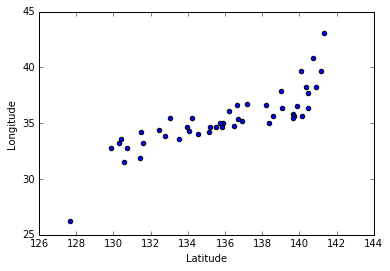

In [6]:
df1.plot(x='Latitude', y='Longitude', kind='scatter')
plt.show()

In [7]:
df1.columns

Index([u'Town', u'Longitude', u'Latitude'], dtype='object')

In [8]:
[key for key in df1.columns]

['Town', 'Longitude', 'Latitude']

In [9]:
for i in df1.index:
    val = [df1.ix[i][s] for s in df1.columns]
    print val

['Sapporo', 43.064170000000004, 141.34693999999999]
['Aomori', 40.824440000000003, 140.74000000000001]
['Morioka', 39.703609999999998, 141.1525]
['Sendai', 38.268889999999999, 140.87194]
['Akita', 39.718609999999998, 140.10249999999999]
['Yamagata', 38.240559999999995, 140.36332999999999]
['Fukushima', 37.75, 140.46778]
['Mito', 36.341390000000004, 140.44666999999998]
['Utsunomiya', 36.565829999999998, 139.88361]
['Maebashi', 36.391109999999998, 139.06083000000001]
['Saitama', 35.856940000000002, 139.64888999999999]
['Chiba', 35.60472, 140.12333000000001]
['Tokyo', 35.689440000000005, 139.69166999999999]
['Yokohama', 35.447780000000002, 139.64250000000001]
['Niigata', 37.90222, 139.02361000000002]
['Toyama', 36.695279999999997, 137.21138999999999]
['Kanazawa', 36.594440000000006, 136.62556000000001]
['Fukui', 36.065280000000001, 136.22193999999999]
['Kofu', 35.663890000000002, 138.56833]
['Nagano', 36.651389999999999, 138.18111000000002]
['Gifu', 35.391109999999998, 136.72221999999999]

In [10]:
for i in df1.index:
    val = {}
    for s in df1.columns:
        val.update({s:df1.ix[i][s]})
    print val

{'Town': 'Sapporo', 'Latitude': 141.34693999999999, 'Longitude': 43.064170000000004}
{'Town': 'Aomori', 'Latitude': 140.74000000000001, 'Longitude': 40.824440000000003}
{'Town': 'Morioka', 'Latitude': 141.1525, 'Longitude': 39.703609999999998}
{'Town': 'Sendai', 'Latitude': 140.87194, 'Longitude': 38.268889999999999}
{'Town': 'Akita', 'Latitude': 140.10249999999999, 'Longitude': 39.718609999999998}
{'Town': 'Yamagata', 'Latitude': 140.36332999999999, 'Longitude': 38.240559999999995}
{'Town': 'Fukushima', 'Latitude': 140.46778, 'Longitude': 37.75}
{'Town': 'Mito', 'Latitude': 140.44666999999998, 'Longitude': 36.341390000000004}
{'Town': 'Utsunomiya', 'Latitude': 139.88361, 'Longitude': 36.565829999999998}
{'Town': 'Maebashi', 'Latitude': 139.06083000000001, 'Longitude': 36.391109999999998}
{'Town': 'Saitama', 'Latitude': 139.64888999999999, 'Longitude': 35.856940000000002}
{'Town': 'Chiba', 'Latitude': 140.12333000000001, 'Longitude': 35.60472}
{'Town': 'Tokyo', 'Latitude': 139.69166999

In [11]:
df2 = pd.read_csv('walk.txt', delimiter="\s+")

In [12]:
df2

,Town1,Town2,Hour,Ferry
0,Sapporo,Aomori,55,True
1,Akita,Aomori,36,NaN
2,Akita,Sendai,45,NaN
3,Akita,Niigata,52,NaN
4,Yamagata,Aomori,75,NaN
5,Morioka,Aomori,37,NaN
6,Morioka,Akita,24,NaN
7,Yamagata,Akita,41,NaN
8,Yamagata,Morioka,46,NaN
9,Yamagata,Sendai,14,NaN


In [13]:
g1 = nx.from_pandas_dataframe(df2, 'Town1', 'Town2', edge_attr='Hour')

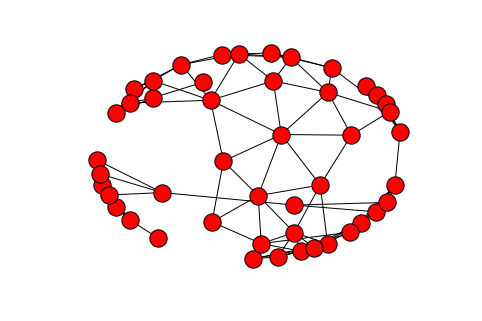

In [14]:
nx.draw(g1)

In [15]:
g1.nodes()

['Fukuoka',
 'Okayama',
 'Miyazaki',
 'Nagoya',
 'Maebashi',
 'Chiba',
 'Oita',
 'Otsu',
 'Tsu',
 'Nara',
 'Takamatsu',
 'Kyoto',
 'Gifu',
 'Mito',
 'Kochi',
 'Yamagata',
 'Kanazawa',
 'Naha',
 'Utsunomiya',
 'Matsue',
 'Nagasaki',
 'Aomori',
 'Tokyo',
 'Nagano',
 'Toyama',
 'Kumamoto',
 'Sendai',
 'Kofu',
 'Morioka',
 'Hiroshima',
 'Niigata',
 'Matsuyama',
 'Fukui',
 'Kagoshima',
 'Saitama',
 'Saga',
 'Tokushima',
 'Osaka',
 'Shizuoka',
 'Akita',
 'Yokohama',
 'Fukushima',
 'Kobe',
 'Yamaguchi',
 'Wakayama',
 'Sapporo',
 'Tottori']

In [16]:
g1.edges()

[('Fukuoka', 'Saga'),
 ('Fukuoka', 'Yamaguchi'),
 ('Fukuoka', 'Kumamoto'),
 ('Fukuoka', 'Oita'),
 ('Okayama', 'Kobe'),
 ('Okayama', 'Takamatsu'),
 ('Okayama', 'Hiroshima'),
 ('Okayama', 'Tottori'),
 ('Okayama', 'Matsue'),
 ('Miyazaki', 'Kagoshima'),
 ('Miyazaki', 'Oita'),
 ('Miyazaki', 'Kumamoto'),
 ('Nagoya', 'Nagano'),
 ('Nagoya', 'Otsu'),
 ('Nagoya', 'Tsu'),
 ('Nagoya', 'Shizuoka'),
 ('Nagoya', 'Gifu'),
 ('Maebashi', 'Utsunomiya'),
 ('Maebashi', 'Nagano'),
 ('Maebashi', 'Saitama'),
 ('Maebashi', 'Niigata'),
 ('Maebashi', 'Kofu'),
 ('Chiba', 'Mito'),
 ('Chiba', 'Saitama'),
 ('Chiba', 'Tokyo'),
 ('Oita', 'Kumamoto'),
 ('Otsu', 'Fukui'),
 ('Otsu', 'Gifu'),
 ('Otsu', 'Kyoto'),
 ('Otsu', 'Osaka'),
 ('Otsu', 'Tsu'),
 ('Otsu', 'Nara'),
 ('Tsu', 'Wakayama'),
 ('Tsu', 'Nara'),
 ('Nara', 'Osaka'),
 ('Nara', 'Wakayama'),
 ('Nara', 'Kyoto'),
 ('Takamatsu', 'Tokushima'),
 ('Takamatsu', 'Kochi'),
 ('Takamatsu', 'Matsuyama'),
 ('Kyoto', 'Fukui'),
 ('Kyoto', 'Osaka'),
 ('Kyoto', 'Kobe'),
 ('Kyoto',

In [17]:
g1.neighbors('Tokyo')

['Chiba', 'Saitama', 'Kofu', 'Yokohama']

In [18]:
nx.degree(g1)

{'Akita': 5,
 'Aomori': 4,
 'Chiba': 3,
 'Fukui': 5,
 'Fukuoka': 4,
 'Fukushima': 5,
 'Gifu': 6,
 'Hiroshima': 4,
 'Kagoshima': 4,
 'Kanazawa': 3,
 'Kobe': 5,
 'Kochi': 3,
 'Kofu': 6,
 'Kumamoto': 6,
 'Kyoto': 6,
 'Maebashi': 5,
 'Matsue': 5,
 'Matsuyama': 3,
 'Mito': 4,
 'Miyazaki': 3,
 'Morioka': 4,
 'Nagano': 7,
 'Nagasaki': 3,
 'Nagoya': 5,
 'Naha': 1,
 'Nara': 5,
 'Niigata': 7,
 'Oita': 3,
 'Okayama': 5,
 'Osaka': 6,
 'Otsu': 7,
 'Saga': 3,
 'Saitama': 6,
 'Sapporo': 1,
 'Sendai': 4,
 'Shizuoka': 4,
 'Takamatsu': 4,
 'Tokushima': 3,
 'Tokyo': 4,
 'Tottori': 7,
 'Toyama': 4,
 'Tsu': 4,
 'Utsunomiya': 5,
 'Wakayama': 3,
 'Yamagata': 6,
 'Yamaguchi': 3,
 'Yokohama': 3}

In [19]:
nx.dijkstra_path_length(g1, 'Sapporo', 'Naha')

13

In [20]:
nx.dijkstra_path(g1, 'Sapporo', 'Naha')

['Sapporo',
 'Aomori',
 'Akita',
 'Niigata',
 'Nagano',
 'Gifu',
 'Fukui',
 'Tottori',
 'Matsue',
 'Yamaguchi',
 'Fukuoka',
 'Kumamoto',
 'Kagoshima',
 'Naha']

In [21]:
for i in df2.index:
    n1, n2, weight, ferry = [df2.ix[i][s] for s in df2.columns]
    g1.add_edge(n1, n2, weight=float(weight))

In [22]:
nx.dijkstra_path_length(g1, 'Sapporo', 'Naha')

466.0

In [23]:
nx.dijkstra_path(g1, 'Sapporo', 'Naha')

['Sapporo',
 'Aomori',
 'Akita',
 'Niigata',
 'Toyama',
 'Kanazawa',
 'Fukui',
 'Kyoto',
 'Kobe',
 'Okayama',
 'Hiroshima',
 'Yamaguchi',
 'Fukuoka',
 'Kumamoto',
 'Kagoshima',
 'Naha']

In [24]:
#ぶっ続けで歩いた場合、何日かかるか
nx.dijkstra_path_length(g1, 'Sapporo', 'Naha') / 24.

19.416666666666668

In [25]:
#１日８時間だけ歩いたとしたら
nx.dijkstra_path_length(g1, 'Sapporo', 'Naha') / 8.

58.25

In [26]:
pos = nx.spring_layout(g1, iterations=50)

In [27]:
pos

{'Akita': array([ 0.44743669,  0.82638943]),
 'Aomori': array([ 0.39290038,  0.88384756]),
 'Chiba': array([ 0.6385793 ,  0.67259488]),
 'Fukui': array([ 0.70266979,  0.57389494]),
 'Fukuoka': array([ 0.28376894,  0.22536114]),
 'Fukushima': array([ 0.48461622,  0.76666796]),
 'Gifu': array([ 0.70637381,  0.70312364]),
 'Hiroshima': array([ 0.58101179,  0.43829906]),
 'Kagoshima': array([ 0.07174222,  0.06575248]),
 'Kanazawa': array([ 0.68788983,  0.69488114]),
 'Kobe': array([ 0.63109436,  0.44295004]),
 'Kochi': array([ 0.95417697,  0.95315832]),
 'Kofu': array([ 0.70857285,  0.80011023]),
 'Kumamoto': array([ 0.15134188,  0.12995784]),
 'Kyoto': array([ 0.71629198,  0.49043089]),
 'Maebashi': array([ 0.61061939,  0.79970239]),
 'Matsue': array([ 0.56096393,  0.4231541 ]),
 'Matsuyama': array([ 0.92169972,  0.97007858]),
 'Mito': array([ 0.54719862,  0.70809726]),
 'Miyazaki': array([ 0.14717615,  0.08382877]),
 'Morioka': array([ 0.37592789,  0.85043181]),
 'Nagano': array([ 0.6781

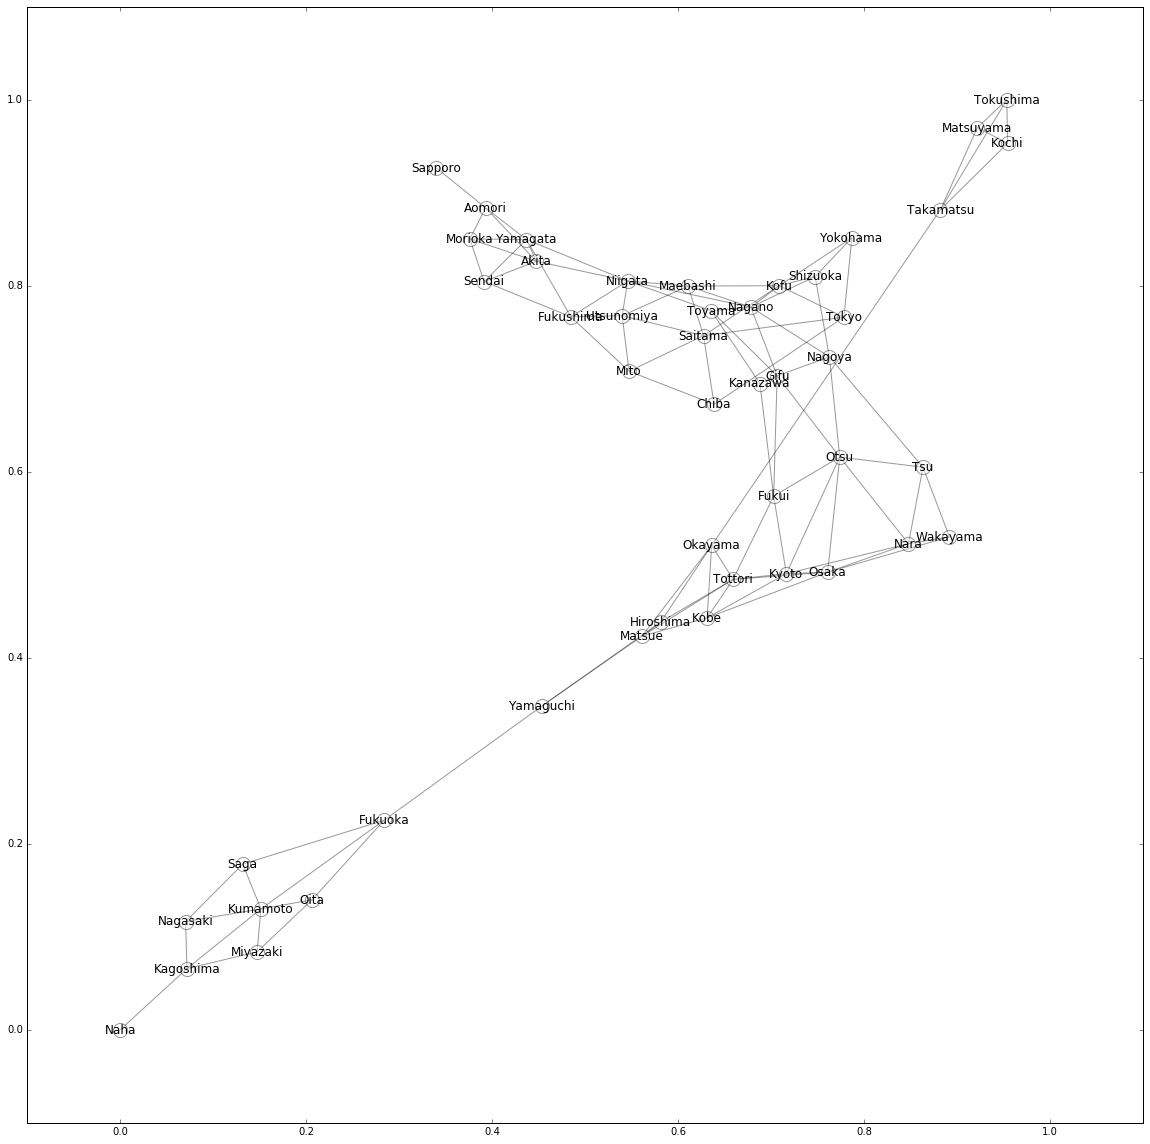

In [28]:
plt.figure(figsize=(20, 20))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
nx.draw_networkx_nodes(g1,pos,node_size=200,node_color='w',alpha=0.4)
nx.draw_networkx_edges(g1,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
labels = nx.draw_networkx_labels(g1,pos,fontsize=14)

In [29]:
pos = {}
for i in df1.index:
    val = {}
    for s in df1.columns:
        val.update({s:df1.ix[i][s]})
    pos.update({val['Town']: [val['Latitude'], val['Longitude']]})
pos

{'Akita': [140.10249999999999, 39.718609999999998],
 'Aomori': [140.74000000000001, 40.824440000000003],
 'Chiba': [140.12333000000001, 35.60472],
 'Fukui': [136.22193999999999, 36.065280000000001],
 'Fukuoka': [130.41806, 33.606390000000005],
 'Fukushima': [140.46778, 37.75],
 'Gifu': [136.72221999999999, 35.391109999999998],
 'Hiroshima': [132.45944, 34.396390000000004],
 'Kagoshima': [130.55806000000001, 31.560279999999999],
 'Kanazawa': [136.62556000000001, 36.594440000000006],
 'Kobe': [135.18306000000001, 34.691390000000006],
 'Kochi': [133.53111000000001, 33.559719999999999],
 'Kofu': [138.56833, 35.663890000000002],
 'Kumamoto': [130.74167, 32.789720000000003],
 'Kyoto': [135.75556, 35.021390000000004],
 'Maebashi': [139.06083000000001, 36.391109999999998],
 'Matsue': [133.05056000000002, 35.47222],
 'Matsuyama': [132.76611, 33.841670000000001],
 'Mito': [140.44666999999998, 36.341390000000004],
 'Miyazaki': [131.42389, 31.911109999999997],
 'Morioka': [141.1525, 39.70360999999

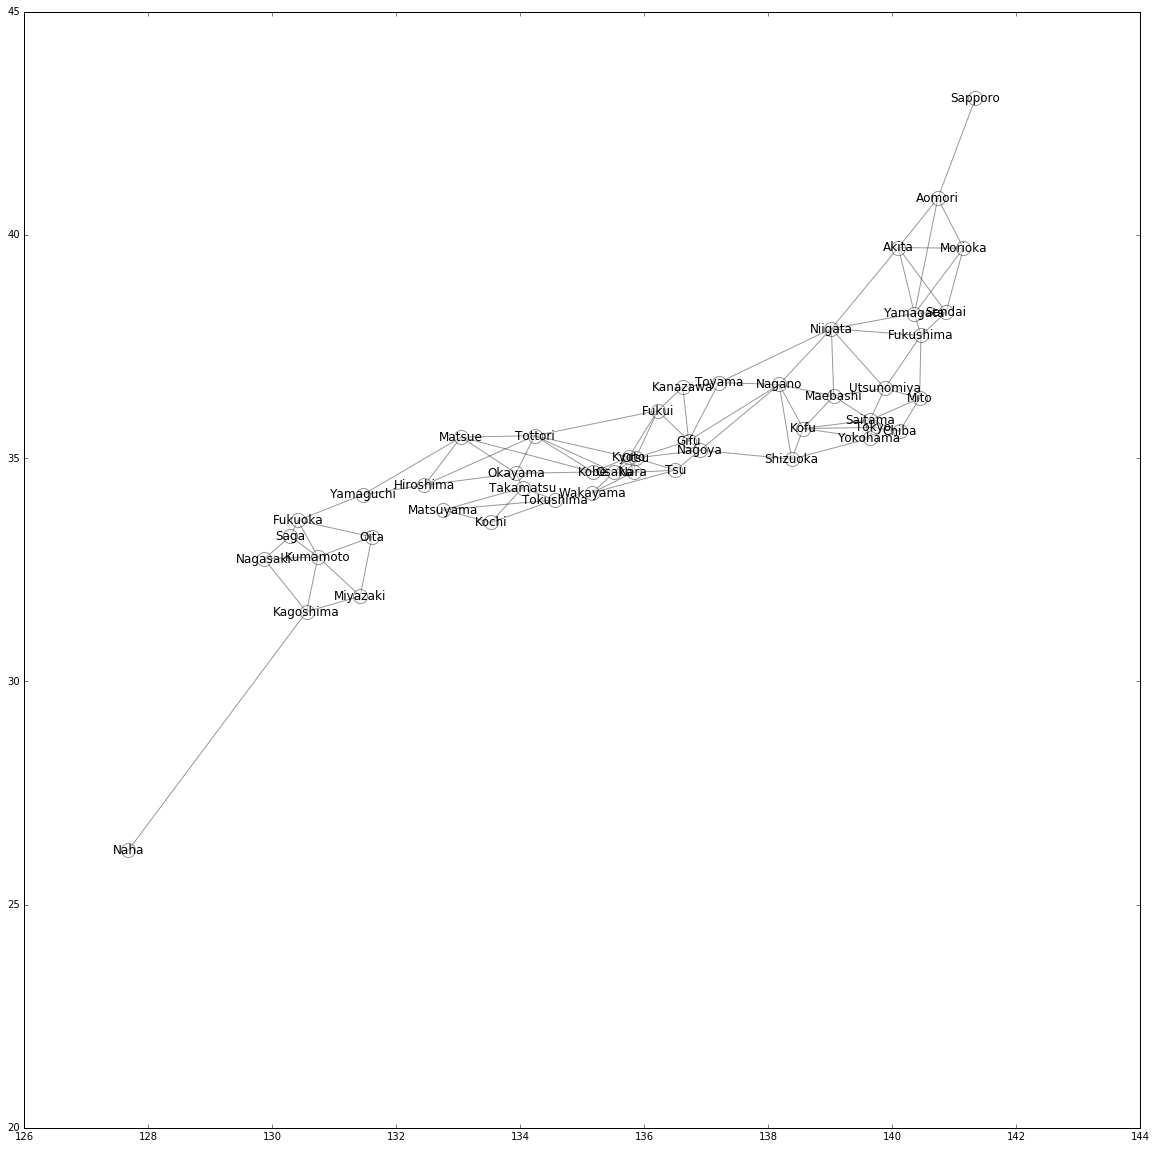

In [30]:
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(g1,pos,node_size=200,node_color='w',alpha=0.4)
nx.draw_networkx_edges(g1,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
labels = nx.draw_networkx_labels(g1,pos,fontsize=14)

In [31]:
nb = nx.betweenness_centrality(g1)
nb

{'Akita': 0.0650742762336965,
 'Aomori': 0.043478260869565216,
 'Chiba': 0.0020727635220388844,
 'Fukui': 0.3609633459590834,
 'Fukuoka': 0.2642512077294686,
 'Fukushima': 0.04010071855991002,
 'Gifu': 0.30457692659065655,
 'Hiroshima': 0.14179576178297407,
 'Kagoshima': 0.04396135265700483,
 'Kanazawa': 0.06689601327282485,
 'Kobe': 0.04234234932444651,
 'Kochi': 0.0,
 'Kofu': 0.08321000142891827,
 'Kumamoto': 0.12077294685990338,
 'Kyoto': 0.04748097833775582,
 'Maebashi': 0.04963148203041415,
 'Matsue': 0.1715697776695219,
 'Matsuyama': 0.0,
 'Mito': 0.012655610626625116,
 'Miyazaki': 0.000966183574879227,
 'Morioka': 0.000644122383252818,
 'Nagano': 0.28623308183186136,
 'Nagasaki': 0.000966183574879227,
 'Nagoya': 0.10676492533090548,
 'Naha': 0.0,
 'Nara': 0.008864691243207868,
 'Niigata': 0.2797874978653011,
 'Oita': 0.01932367149758454,
 'Okayama': 0.16264090177133655,
 'Osaka': 0.06352882332848231,
 'Otsu': 0.11071584264768632,
 'Saga': 0.01932367149758454,
 'Saitama': 0.04104

In [32]:
nx.set_node_attributes(g1, 'betweenness', nb)

In [33]:
g1.node['Tokyo']

{'betweenness': 0.014394601640978442}

In [34]:
nx.set_node_attributes(g1, 'degree', nx.degree(g1))

In [35]:
g1.node['Tokyo']

{'betweenness': 0.014394601640978442, 'degree': 4}

In [36]:
nx.set_node_attributes(g1, 'pos', pos)

In [37]:
g1.node['Tokyo']

{'betweenness': 0.014394601640978442,
 'degree': 4,
 'pos': [139.69166999999999, 35.689440000000005]}

In [38]:
nx.set_node_attributes(g1, 'color', 
                       nx.coloring.greedy_color(g1, strategy=nx.coloring.strategy_largest_first))

In [39]:
g1.node['Tokyo']

{'betweenness': 0.014394601640978442,
 'color': 2,
 'degree': 4,
 'pos': [139.69166999999999, 35.689440000000005]}

In [40]:
nb = nx.get_node_attributes(g1,'betweenness')
nb

{'Akita': 0.0650742762336965,
 'Aomori': 0.043478260869565216,
 'Chiba': 0.0020727635220388844,
 'Fukui': 0.3609633459590834,
 'Fukuoka': 0.2642512077294686,
 'Fukushima': 0.04010071855991002,
 'Gifu': 0.30457692659065655,
 'Hiroshima': 0.14179576178297407,
 'Kagoshima': 0.04396135265700483,
 'Kanazawa': 0.06689601327282485,
 'Kobe': 0.04234234932444651,
 'Kochi': 0.0,
 'Kofu': 0.08321000142891827,
 'Kumamoto': 0.12077294685990338,
 'Kyoto': 0.04748097833775582,
 'Maebashi': 0.04963148203041415,
 'Matsue': 0.1715697776695219,
 'Matsuyama': 0.0,
 'Mito': 0.012655610626625116,
 'Miyazaki': 0.000966183574879227,
 'Morioka': 0.000644122383252818,
 'Nagano': 0.28623308183186136,
 'Nagasaki': 0.000966183574879227,
 'Nagoya': 0.10676492533090548,
 'Naha': 0.0,
 'Nara': 0.008864691243207868,
 'Niigata': 0.2797874978653011,
 'Oita': 0.01932367149758454,
 'Okayama': 0.16264090177133655,
 'Osaka': 0.06352882332848231,
 'Otsu': 0.11071584264768632,
 'Saga': 0.01932367149758454,
 'Saitama': 0.04104

In [41]:
color = nx.get_node_attributes(g1,'betweenness')
color

{'Akita': 0.0650742762336965,
 'Aomori': 0.043478260869565216,
 'Chiba': 0.0020727635220388844,
 'Fukui': 0.3609633459590834,
 'Fukuoka': 0.2642512077294686,
 'Fukushima': 0.04010071855991002,
 'Gifu': 0.30457692659065655,
 'Hiroshima': 0.14179576178297407,
 'Kagoshima': 0.04396135265700483,
 'Kanazawa': 0.06689601327282485,
 'Kobe': 0.04234234932444651,
 'Kochi': 0.0,
 'Kofu': 0.08321000142891827,
 'Kumamoto': 0.12077294685990338,
 'Kyoto': 0.04748097833775582,
 'Maebashi': 0.04963148203041415,
 'Matsue': 0.1715697776695219,
 'Matsuyama': 0.0,
 'Mito': 0.012655610626625116,
 'Miyazaki': 0.000966183574879227,
 'Morioka': 0.000644122383252818,
 'Nagano': 0.28623308183186136,
 'Nagasaki': 0.000966183574879227,
 'Nagoya': 0.10676492533090548,
 'Naha': 0.0,
 'Nara': 0.008864691243207868,
 'Niigata': 0.2797874978653011,
 'Oita': 0.01932367149758454,
 'Okayama': 0.16264090177133655,
 'Osaka': 0.06352882332848231,
 'Otsu': 0.11071584264768632,
 'Saga': 0.01932367149758454,
 'Saitama': 0.04104

In [42]:
eb = nx.edge_betweenness_centrality(g1, normalized=False)
eb

{('Aomori', 'Akita'): 39.72727272727272,
 ('Aomori', 'Morioka'): 2.6666666666666665,
 ('Aomori', 'Sapporo'): 46.0,
 ('Chiba', 'Mito'): 11.297691197691195,
 ('Chiba', 'Saitama'): 22.982539682539674,
 ('Chiba', 'Tokyo'): 16.010389610389595,
 ('Fukui', 'Tottori'): 376.0881886087769,
 ('Fukuoka', 'Kumamoto'): 160.0,
 ('Fukuoka', 'Oita'): 60.5,
 ('Fukuoka', 'Saga'): 60.5,
 ('Fukuoka', 'Yamaguchi'): 312.0,
 ('Gifu', 'Fukui'): 287.9458874458874,
 ('Gifu', 'Kanazawa'): 7.883333333333333,
 ('Gifu', 'Nagano'): 228.36132084289974,
 ('Gifu', 'Toyama'): 91.84960770223928,
 ('Hiroshima', 'Tottori'): 154.59194677871147,
 ('Hiroshima', 'Yamaguchi'): 155.75861344537816,
 ('Kanazawa', 'Fukui'): 92.08737373737372,
 ('Kanazawa', 'Toyama'): 84.5040404040404,
 ('Kobe', 'Tottori'): 6.16962481962482,
 ('Kochi', 'Matsuyama'): 1.0,
 ('Kochi', 'Tokushima'): 1.0,
 ('Kofu', 'Saitama'): 37.38634859292752,
 ('Kofu', 'Shizuoka'): 15.249224751856332,
 ('Kofu', 'Yokohama'): 13.007936507936508,
 ('Kumamoto', 'Kagoshima'

In [43]:
nx.set_edge_attributes(g1, 'betweenness', eb)

In [44]:
eb =nx.get_edge_attributes(g1,'betweenness')
eb

{('Aomori', 'Akita'): 39.72727272727272,
 ('Aomori', 'Morioka'): 2.6666666666666665,
 ('Aomori', 'Sapporo'): 46.0,
 ('Chiba', 'Mito'): 11.297691197691195,
 ('Chiba', 'Saitama'): 22.982539682539674,
 ('Chiba', 'Tokyo'): 16.010389610389595,
 ('Fukui', 'Tottori'): 376.0881886087769,
 ('Fukuoka', 'Kumamoto'): 160.0,
 ('Fukuoka', 'Oita'): 60.5,
 ('Fukuoka', 'Saga'): 60.5,
 ('Fukuoka', 'Yamaguchi'): 312.0,
 ('Gifu', 'Fukui'): 287.9458874458874,
 ('Gifu', 'Kanazawa'): 7.883333333333333,
 ('Gifu', 'Nagano'): 228.36132084289974,
 ('Gifu', 'Toyama'): 91.84960770223928,
 ('Hiroshima', 'Tottori'): 154.59194677871147,
 ('Hiroshima', 'Yamaguchi'): 155.75861344537816,
 ('Kanazawa', 'Fukui'): 92.08737373737372,
 ('Kanazawa', 'Toyama'): 84.5040404040404,
 ('Kobe', 'Tottori'): 6.16962481962482,
 ('Kochi', 'Matsuyama'): 1.0,
 ('Kochi', 'Tokushima'): 1.0,
 ('Kofu', 'Saitama'): 37.38634859292752,
 ('Kofu', 'Shizuoka'): 15.249224751856332,
 ('Kofu', 'Yokohama'): 13.007936507936508,
 ('Kumamoto', 'Kagoshima'

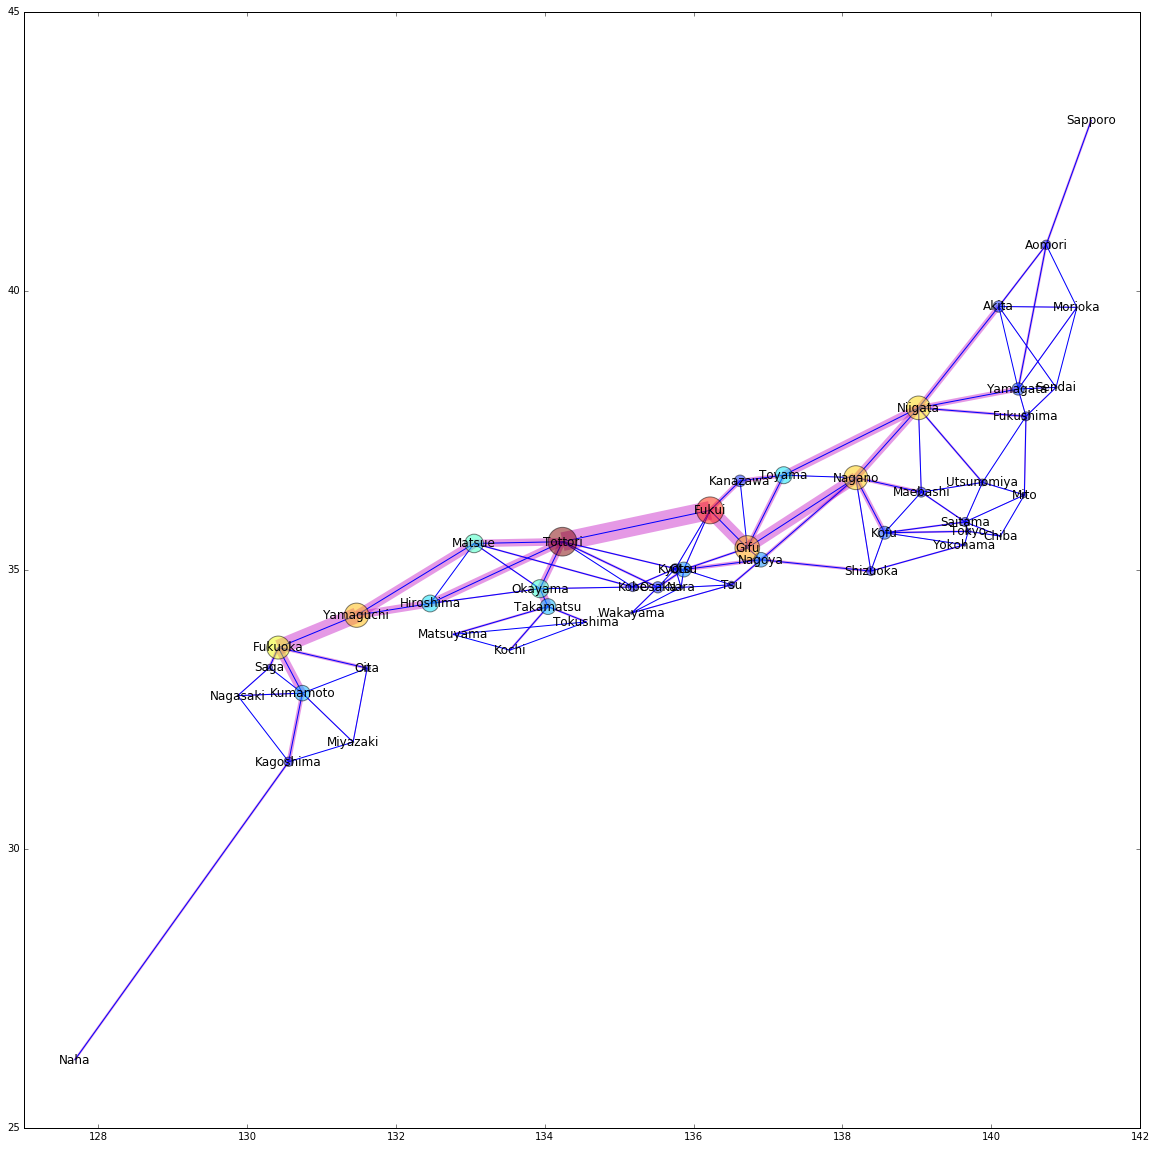

In [45]:
plt.figure(figsize=(20, 20))
plt.xlim([127,142])
plt.ylim([25,45])
edgewidth = [eb[edge] / 20.0 for edge in g1.edges()]
nodesize = [nb[node] * 2000 for node in g1.nodes()]
nodecolor = [color[node] for node in g1.nodes()]
edges = nx.draw_networkx_edges(g1,pos,alpha=0.4,width=edgewidth,edge_color='m')
edges = nx.draw_networkx_edges(g1,pos,alpha=1,width=1,edge_color='b')
nodes = nx.draw_networkx_nodes(g1,pos,node_size=nodesize,node_color=nodecolor, alpha=0.5)
labels = nx.draw_networkx_labels(g1,pos,fontsize=6)
#nx.draw(g1, pos=nx.spring_layout(g1, scale=10, iterations=200), node_size=20, with_labels=True)
#plt.savefig('sample.png')    

In [46]:
edge_freq = {}
node_freq = {}
for edge in g1.edges():
    edge_freq.update({edge:0})
for node in g1.nodes():
    node_freq.update({node:0})
for town in g1.nodes():
    path = nx.dijkstra_path(g1, town, 'Tokyo')
    for town in path:
        node_freq[town] += 1
    for i in range(len(path) - 1):
        edge = (path[i], path[i + 1])
        if edge_freq.has_key(edge):
            edge_freq[edge] += 1
        else:
            edge_freq[tuple(reversed(list(edge)))] += 1

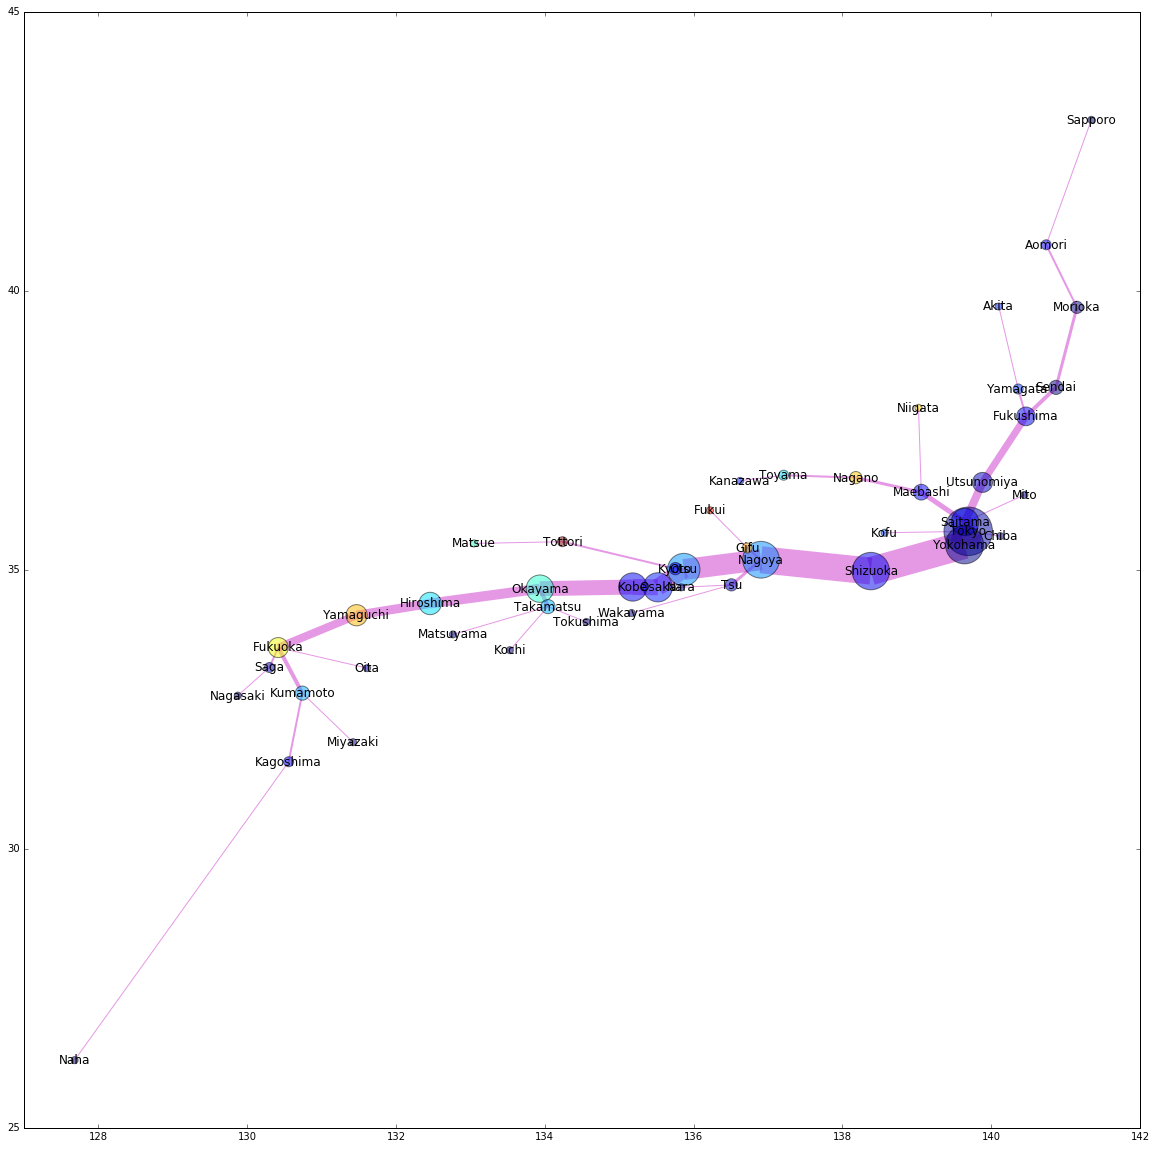

In [47]:
plt.figure(figsize=(20, 20))
plt.xlim([127,142])
plt.ylim([25,45])
edgewidth = [edge_freq[edge] for edge in g1.edges()]
nodesize = [node_freq[node] * 50 for node in g1.nodes()]
edges = nx.draw_networkx_edges(g1,pos,alpha=0.4,width=edgewidth,edge_color='m')
#edges = nx.draw_networkx_edges(g1,pos,alpha=1,width=1,edge_color='b')
nodes = nx.draw_networkx_nodes(g1,pos,node_size=nodesize,node_color=nodecolor, alpha=0.5)
labels = nx.draw_networkx_labels(g1,pos,fontsize=6)
#nx.draw(g1, pos=nx.spring_layout(g1, scale=10, iterations=200), node_size=20, with_labels=True)
#plt.savefig('sample.png')    

In [48]:
edge_freq = {}
node_freq = {}
for edge in g1.edges():
    edge_freq.update({edge:0})
for node in g1.nodes():
    node_freq.update({node:0})
for town1 in g1.nodes():
    for town2 in g1.nodes():
        path = nx.dijkstra_path(g1, town1, town2)
        for town3 in path:
            node_freq[town3] += 1
        for i in range(len(path) - 1):
            edge = (path[i], path[i + 1])
            if edge_freq.has_key(edge):
                edge_freq[edge] += 1
            else:
                edge_freq[tuple(reversed(list(edge)))] += 1

In [49]:
for k, v in sorted(edge_freq.items(), key=lambda x: 0 - x[1]):
    print (k, v)

(('Okayama', 'Kobe'), 900)
(('Okayama', 'Hiroshima'), 700)
(('Hiroshima', 'Yamaguchi'), 648)
(('Fukuoka', 'Yamaguchi'), 624)
(('Kyoto', 'Kobe'), 592)
(('Kanazawa', 'Fukui'), 492)
(('Kanazawa', 'Toyama'), 478)
(('Nagoya', 'Shizuoka'), 426)
(('Toyama', 'Niigata'), 424)
(('Nagoya', 'Otsu'), 420)
(('Kyoto', 'Fukui'), 396)
(('Okayama', 'Takamatsu'), 344)
(('Osaka', 'Kobe'), 344)
(('Shizuoka', 'Yokohama'), 336)
(('Fukuoka', 'Kumamoto'), 320)
(('Tokyo', 'Yokohama'), 314)
(('Otsu', 'Kyoto'), 290)
(('Niigata', 'Akita'), 266)
(('Otsu', 'Osaka'), 260)
(('Tokyo', 'Saitama'), 228)
(('Kumamoto', 'Kagoshima'), 168)
(('Fukuoka', 'Saga'), 160)
(('Aomori', 'Akita'), 140)
(('Yamagata', 'Niigata'), 124)
(('Utsunomiya', 'Saitama'), 120)
(('Maebashi', 'Nagano'), 104)
(('Naha', 'Kagoshima'), 92)
(('Aomori', 'Sapporo'), 92)
(('Nagoya', 'Nagano'), 90)
(('Takamatsu', 'Matsuyama'), 88)
(('Takamatsu', 'Tokushima'), 88)
(('Otsu', 'Gifu'), 88)
(('Takamatsu', 'Kochi'), 88)
(('Nagoya', 'Tsu'), 86)
(('Miyazaki', 'Kuma

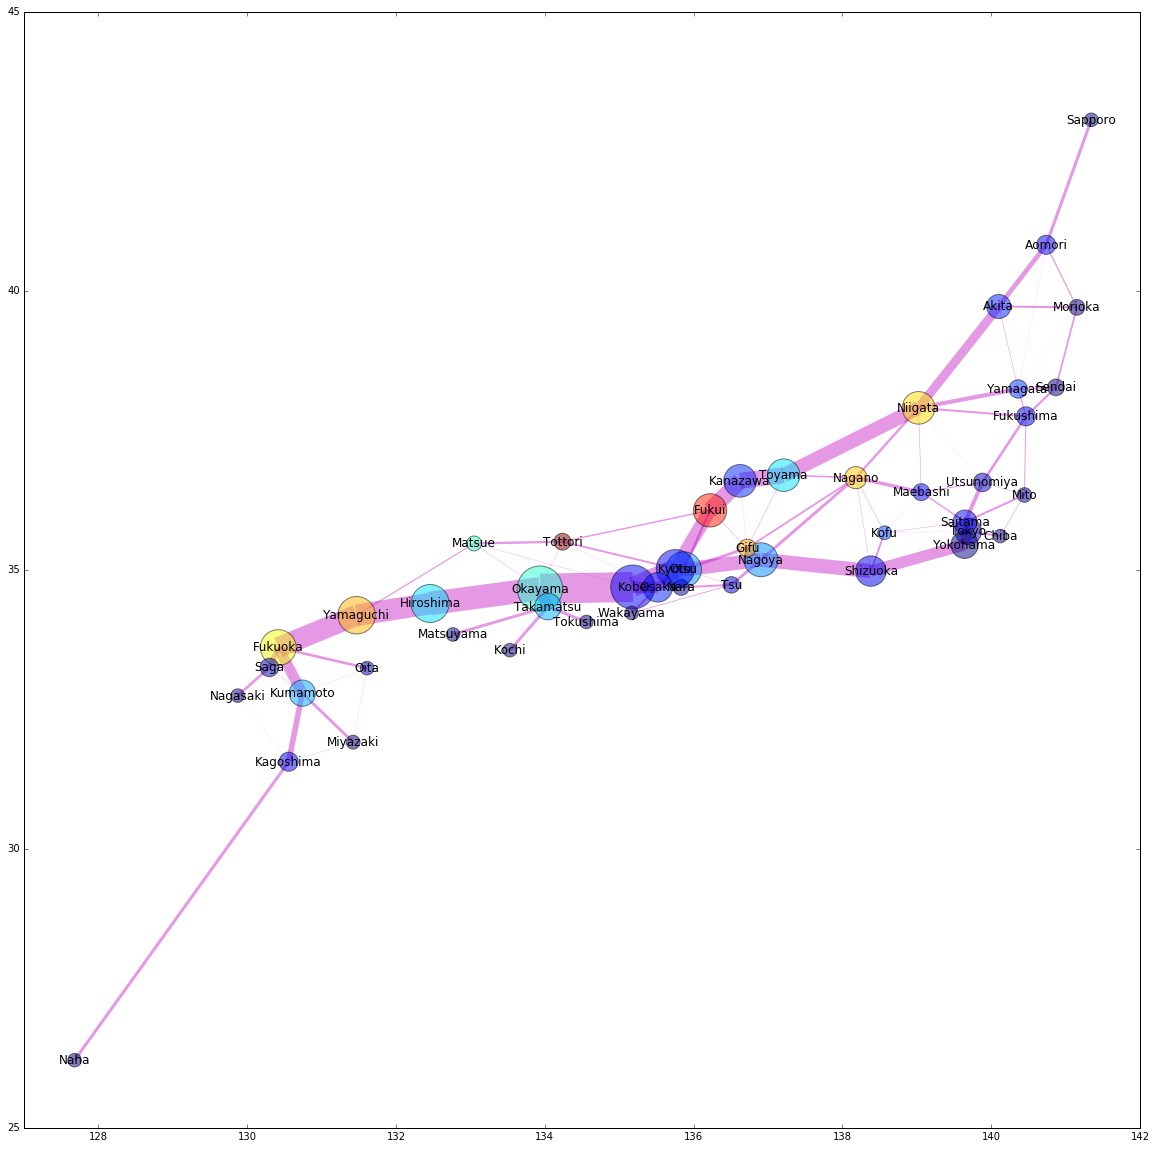

In [50]:
plt.figure(figsize=(20, 20))
plt.xlim([127,142])
plt.ylim([25,45])
edgewidth = [edge_freq[edge] / 30. for edge in g1.edges()]
nodesize = [node_freq[node] * 2. for node in g1.nodes()]
edges = nx.draw_networkx_edges(g1,pos,alpha=0.4,width=edgewidth,edge_color='m')
#edges = nx.draw_networkx_edges(g1,pos,alpha=1,width=1,edge_color='b')
nodes = nx.draw_networkx_nodes(g1,pos,node_size=nodesize,node_color=nodecolor, alpha=0.5)
labels = nx.draw_networkx_labels(g1,pos,fontsize=6)
#nx.draw(g1, pos=nx.spring_layout(g1, scale=10, iterations=200), node_size=20, with_labels=True)
#plt.savefig('sample.png')    

In [51]:
list(nx.find_cliques(g1))

[['Fukuoka', 'Yamaguchi'],
 ['Fukuoka', 'Kumamoto', 'Saga'],
 ['Fukuoka', 'Kumamoto', 'Oita'],
 ['Miyazaki', 'Kumamoto', 'Kagoshima'],
 ['Miyazaki', 'Kumamoto', 'Oita'],
 ['Kumamoto', 'Nagasaki', 'Saga'],
 ['Kumamoto', 'Nagasaki', 'Kagoshima'],
 ['Chiba', 'Saitama', 'Mito'],
 ['Chiba', 'Saitama', 'Tokyo'],
 ['Morioka', 'Akita', 'Yamagata', 'Sendai'],
 ['Morioka', 'Akita', 'Yamagata', 'Aomori'],
 ['Tsu', 'Otsu', 'Nara'],
 ['Tsu', 'Otsu', 'Nagoya'],
 ['Tsu', 'Wakayama', 'Nara'],
 ['Nara', 'Osaka', 'Otsu', 'Kyoto'],
 ['Nara', 'Osaka', 'Wakayama'],
 ['Takamatsu', 'Tokushima', 'Kochi', 'Matsuyama'],
 ['Takamatsu', 'Okayama'],
 ['Kyoto', 'Fukui', 'Otsu'],
 ['Kyoto', 'Fukui', 'Tottori'],
 ['Kyoto', 'Osaka', 'Kobe', 'Tottori'],
 ['Mito', 'Utsunomiya', 'Fukushima'],
 ['Mito', 'Utsunomiya', 'Saitama'],
 ['Yamagata', 'Fukushima', 'Sendai'],
 ['Yamagata', 'Fukushima', 'Niigata'],
 ['Yamagata', 'Akita', 'Niigata'],
 ['Kanazawa', 'Gifu', 'Fukui'],
 ['Kanazawa', 'Gifu', 'Toyama'],
 ['Naha', 'Kagoshim

In [52]:
# A k-clique community is the union of all cliques of size k 
# that can be reached through adjacent (sharing k-1 nodes) k-cliques.
list(nx.k_clique_communities(g1, 4))

[frozenset({'Hiroshima', 'Kobe', 'Matsue', 'Okayama', 'Tottori'}),
 frozenset({'Kobe', 'Kyoto', 'Osaka', 'Tottori'}),
 frozenset({'Kyoto', 'Nara', 'Osaka', 'Otsu'}),
 frozenset({'Akita', 'Aomori', 'Morioka', 'Sendai', 'Yamagata'}),
 frozenset({'Kochi', 'Matsuyama', 'Takamatsu', 'Tokushima'})]

In [53]:
list(nx.k_clique_communities(g1, 3))

[frozenset({'Akita',
            'Aomori',
            'Chiba',
            'Fukui',
            'Fukushima',
            'Gifu',
            'Hiroshima',
            'Kanazawa',
            'Kobe',
            'Kofu',
            'Kyoto',
            'Maebashi',
            'Matsue',
            'Mito',
            'Morioka',
            'Nagano',
            'Nagoya',
            'Nara',
            'Niigata',
            'Okayama',
            'Osaka',
            'Otsu',
            'Saitama',
            'Sendai',
            'Shizuoka',
            'Tokyo',
            'Tottori',
            'Toyama',
            'Tsu',
            'Utsunomiya',
            'Wakayama',
            'Yamagata',
            'Yamaguchi',
            'Yokohama'}),
 frozenset({'Fukuoka',
            'Kagoshima',
            'Kumamoto',
            'Miyazaki',
            'Nagasaki',
            'Oita',
            'Saga'}),
 frozenset({'Kochi', 'Matsuyama', 'Takamatsu', 'Tokushima'})]

In [54]:
list(nx.connected_components(g1))

[{'Akita',
  'Aomori',
  'Chiba',
  'Fukui',
  'Fukuoka',
  'Fukushima',
  'Gifu',
  'Hiroshima',
  'Kagoshima',
  'Kanazawa',
  'Kobe',
  'Kochi',
  'Kofu',
  'Kumamoto',
  'Kyoto',
  'Maebashi',
  'Matsue',
  'Matsuyama',
  'Mito',
  'Miyazaki',
  'Morioka',
  'Nagano',
  'Nagasaki',
  'Nagoya',
  'Naha',
  'Nara',
  'Niigata',
  'Oita',
  'Okayama',
  'Osaka',
  'Otsu',
  'Saga',
  'Saitama',
  'Sapporo',
  'Sendai',
  'Shizuoka',
  'Takamatsu',
  'Tokushima',
  'Tokyo',
  'Tottori',
  'Toyama',
  'Tsu',
  'Utsunomiya',
  'Wakayama',
  'Yamagata',
  'Yamaguchi',
  'Yokohama'}]

In [55]:
nx.cycle_basis(g1)

[['Okayama', 'Tottori', 'Matsue'],
 ['Kobe', 'Tottori', 'Matsue'],
 ['Hiroshima', 'Tottori', 'Matsue'],
 ['Kyoto', 'Osaka', 'Tottori'],
 ['Kobe', 'Osaka', 'Tottori'],
 ['Otsu', 'Nara', 'Osaka'],
 ['Wakayama', 'Nara', 'Osaka'],
 ['Kyoto', 'Nara', 'Osaka'],
 ['Otsu', 'Tsu', 'Nara'],
 ['Wakayama', 'Tsu', 'Nara'],
 ['Otsu', 'Nagoya', 'Tsu'],
 ['Fukui', 'Gifu', 'Nagoya', 'Tsu', 'Nara', 'Osaka', 'Tottori'],
 ['Nagano', 'Gifu', 'Nagoya'],
 ['Otsu', 'Gifu', 'Nagoya'],
 ['Fukui', 'Kanazawa', 'Gifu'],
 ['Toyama', 'Kanazawa', 'Gifu'],
 ['Nagano', 'Toyama', 'Gifu'],
 ['Nagano', 'Niigata', 'Toyama'],
 ['Akita', 'Yamagata', 'Niigata'],
 ['Fukushima', 'Yamagata', 'Niigata'],
 ['Akita', 'Morioka', 'Yamagata'],
 ['Sendai', 'Morioka', 'Yamagata'],
 ['Aomori', 'Morioka', 'Yamagata'],
 ['Fukushima', 'Sendai', 'Yamagata'],
 ['Akita', 'Sendai', 'Yamagata'],
 ['Akita', 'Aomori', 'Yamagata'],
 ['Utsunomiya', 'Fukushima', 'Niigata'],
 ['Utsunomiya', 'Mito', 'Fukushima'],
 ['Utsunomiya', 'Saitama', 'Mito'],
 ['

In [56]:
# A graph is biconnected if, and only if, it cannot be disconnected by removing only one node 
# (and all edges incident on that node). If removing a node increases the number of disconnected 
# components in the graph, that node is called an articulation point, or cut vertex. 
# A biconnected graph has no articulation points.
list(nx.biconnected_components(g1))

[{'Kagoshima', 'Naha'},
 {'Fukuoka', 'Kagoshima', 'Kumamoto', 'Miyazaki', 'Nagasaki', 'Oita', 'Saga'},
 {'Kochi', 'Matsuyama', 'Takamatsu', 'Tokushima'},
 {'Okayama', 'Takamatsu'},
 {'Aomori', 'Sapporo'},
 {'Akita',
  'Aomori',
  'Chiba',
  'Fukui',
  'Fukushima',
  'Gifu',
  'Hiroshima',
  'Kanazawa',
  'Kobe',
  'Kofu',
  'Kyoto',
  'Maebashi',
  'Matsue',
  'Mito',
  'Morioka',
  'Nagano',
  'Nagoya',
  'Nara',
  'Niigata',
  'Okayama',
  'Osaka',
  'Otsu',
  'Saitama',
  'Sendai',
  'Shizuoka',
  'Tokyo',
  'Tottori',
  'Toyama',
  'Tsu',
  'Utsunomiya',
  'Wakayama',
  'Yamagata',
  'Yamaguchi',
  'Yokohama'},
 {'Fukuoka', 'Yamaguchi'}]

In [57]:
list(nx.articulation_points(g1))

['Kagoshima', 'Takamatsu', 'Okayama', 'Aomori', 'Yamaguchi', 'Fukuoka']